### Read Raw Seabird CSV file for Quicklook

- csv output files should be erddap compliant

In [1]:
import EcoFOCI_Seabird_QuickLook as EcoSeabird
import glob
import ctd

%matplotlib inline


In [2]:
fpath = '/Users/bell/ecoraid/2019/CTDcasts/os1901l3/rawconverted/'

In [3]:
verbose= True
save_csv = True
for ctdfile in sorted(glob.glob(fpath + '*.cnv')):
    print(f"Working on {ctdfile}")
    try:
        ctd_df = ctd.from_cnv(ctdfile)

        ctd_df.describe()

        #add a column for erddap - profileid
        # following entries are from cnv files.  check for consistency with cast logs
        ctd_df['profile_id'] = fpath.split('/')[-3]+ctd_df._metadata['name']
        ctd_df['latitude'] = ctd_df._metadata['lat']
        ctd_df['longitude'] = ctd_df._metadata['lon']
        ctd_df['time'] = ctd_df._metadata['time']

        if verbose:
            saldiff = ctd_df.sal00-ctd_df.sal11
            print(f"Profile Averaged Salinity Difference,STD (chan1-chan2){saldiff.mean()},{saldiff.std()}")
        if save_csv:
            ctd_df.to_csv(ctdfile.split('/')[-1].replace('.cnv','.csv'))
    except:
        pass

Working on /Users/bell/ecoraid/2019/CTDcasts/os1901l3/rawconverted/ctd074.cnv
Profile Averaged Salinity Difference,STD (chan1-chan2)-0.009684782608695633,0.015419438920348175
Working on /Users/bell/ecoraid/2019/CTDcasts/os1901l3/rawconverted/ctd075.cnv
Profile Averaged Salinity Difference,STD (chan1-chan2)-0.00759756097560964,0.017352557272702726
Working on /Users/bell/ecoraid/2019/CTDcasts/os1901l3/rawconverted/ctd076.cnv
Profile Averaged Salinity Difference,STD (chan1-chan2)-0.00499032258064522,0.00777908969990299
Working on /Users/bell/ecoraid/2019/CTDcasts/os1901l3/rawconverted/ctd077.cnv
Profile Averaged Salinity Difference,STD (chan1-chan2)-0.0065210526315794565,0.02147405615433001
Working on /Users/bell/ecoraid/2019/CTDcasts/os1901l3/rawconverted/ctd078.cnv
Profile Averaged Salinity Difference,STD (chan1-chan2)-0.19578157894736867,0.031805259256268745
Working on /Users/bell/ecoraid/2019/CTDcasts/os1901l3/rawconverted/ctd079.cnv
Profile Averaged Salinity Difference,STD (chan1-cha

### Create and Save Plots

Inputs are the respective columns in the data fram and identifiers for coloring.

Working on /Users/bell/ecoraid/2019/CTDcasts/os1901l3/rawconverted/ctd074.cnv
Working on /Users/bell/ecoraid/2019/CTDcasts/os1901l3/rawconverted/ctd075.cnv


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/seawater/eos80.py:413: RuntimeWarning: invalid value encountered in sqrt
  s ** 0.5 + d * s ** 2)


Working on /Users/bell/ecoraid/2019/CTDcasts/os1901l3/rawconverted/ctd076.cnv
Working on /Users/bell/ecoraid/2019/CTDcasts/os1901l3/rawconverted/ctd077.cnv
Working on /Users/bell/ecoraid/2019/CTDcasts/os1901l3/rawconverted/ctd078.cnv


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Working on /Users/bell/ecoraid/2019/CTDcasts/os1901l3/rawconverted/ctd079.cnv
Working on /Users/bell/ecoraid/2019/CTDcasts/os1901l3/rawconverted/ctd080.cnv
Working on /Users/bell/ecoraid/2019/CTDcasts/os1901l3/rawconverted/ctd081.cnv
Working on /Users/bell/ecoraid/2019/CTDcasts/os1901l3/rawconverted/ctd082.cnv
Working on /Users/bell/ecoraid/2019/CTDcasts/os1901l3/rawconverted/ctd083.cnv
Working on /Users/bell/ecoraid/2019/CTDcasts/os1901l3/rawconverted/ctd084.cnv
Working on /Users/bell/ecoraid/2019/CTDcasts/os1901l3/rawconverted/ctd085.cnv
Working on /Users/bell/ecoraid/2019/CTDcasts/os1901l3/rawconverted/ctd086.cnv
Working on /Users/bell/ecoraid/2019/CTDcasts/os1901l3/rawconverted/ctd087.cnv
Working on /Users/bell/ecoraid/2019/CTDcasts/os1901l3/rawconverted/ctd088.cnv
Working on /Users/bell/ecoraid/2019/CTDcasts/os1901l3/rawconverted/ctd089.cnv
Working on /Users/bell/ecoraid/2019/CTDcasts/os1901l3/rawconverted/ctd090.cnv
Working on /Users/bell/ecoraid/2019/CTDcasts/os1901l3/rawconvert

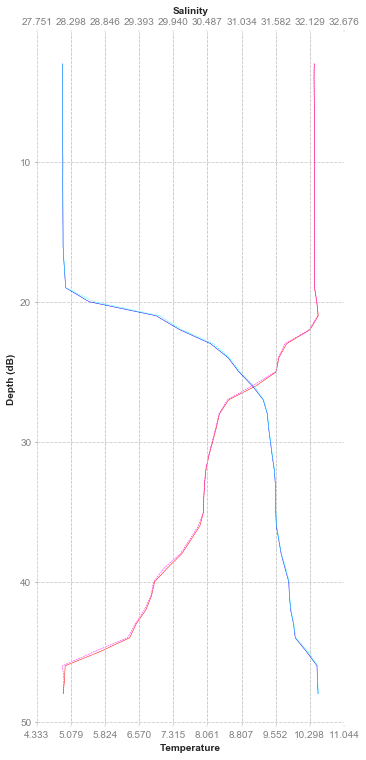

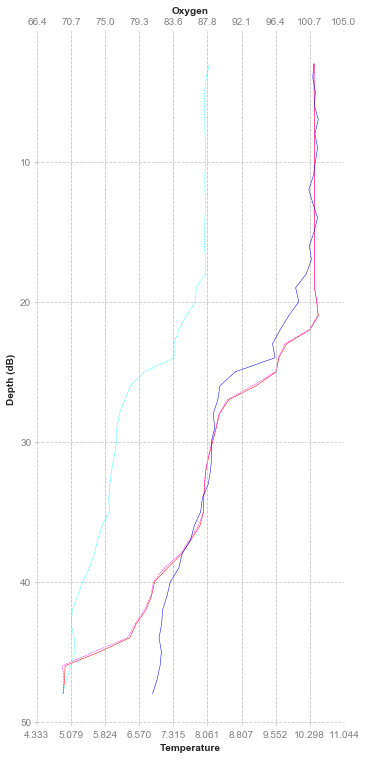

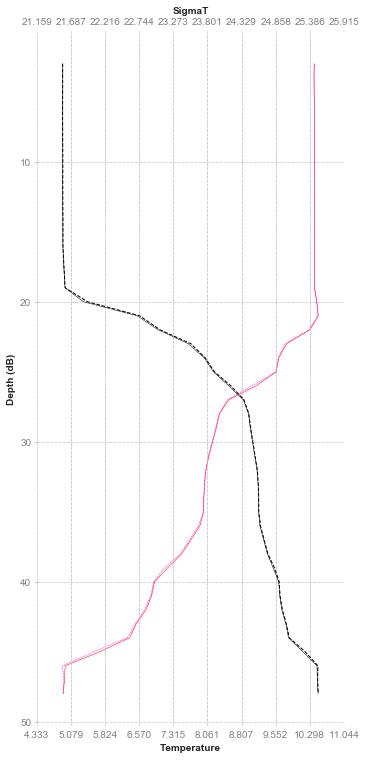

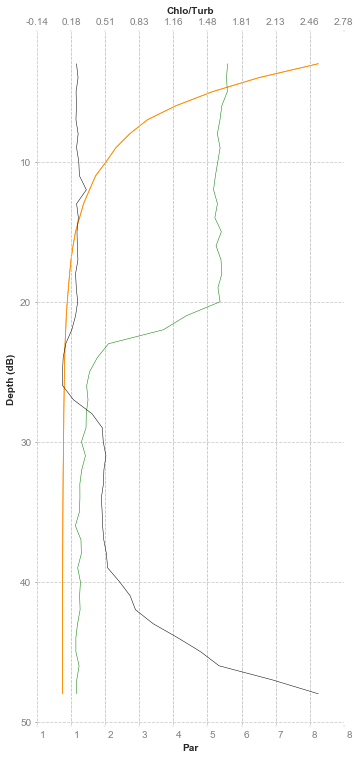

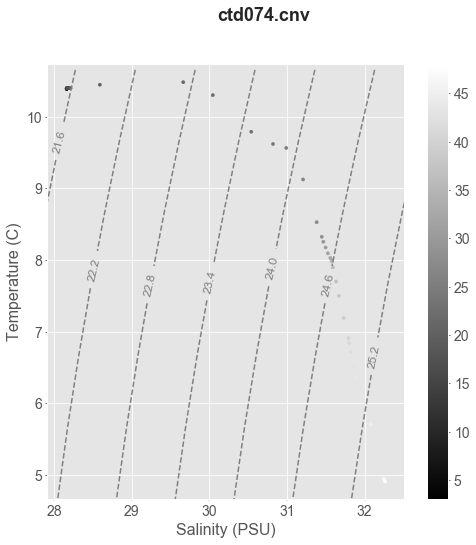

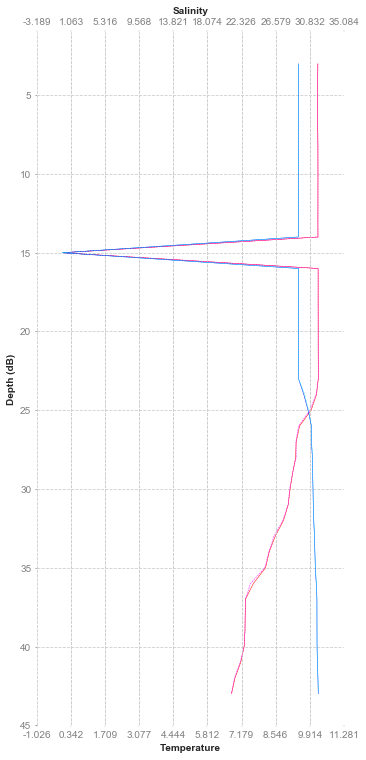

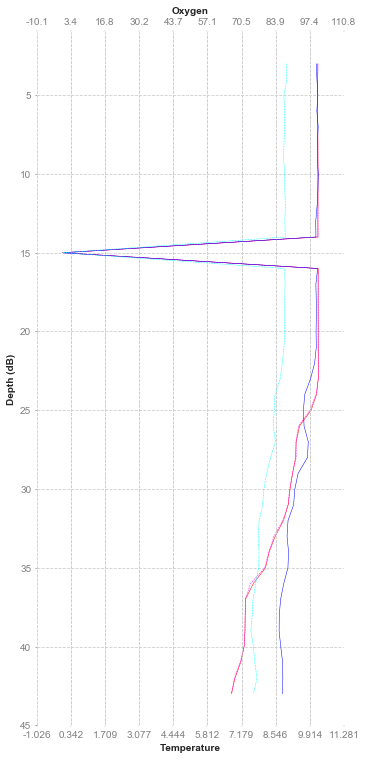

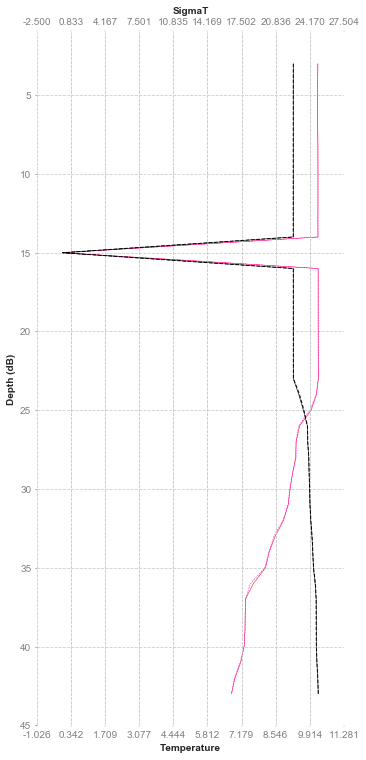

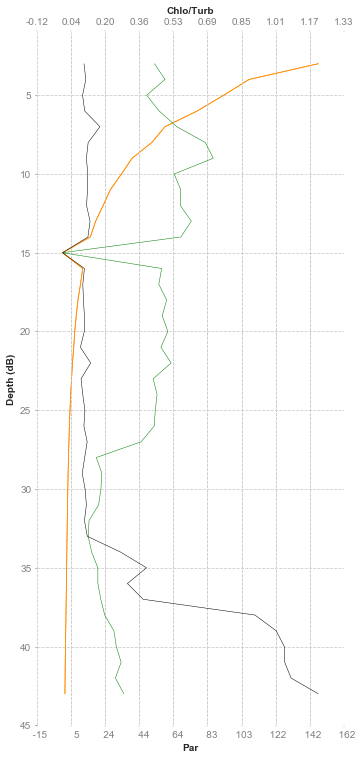

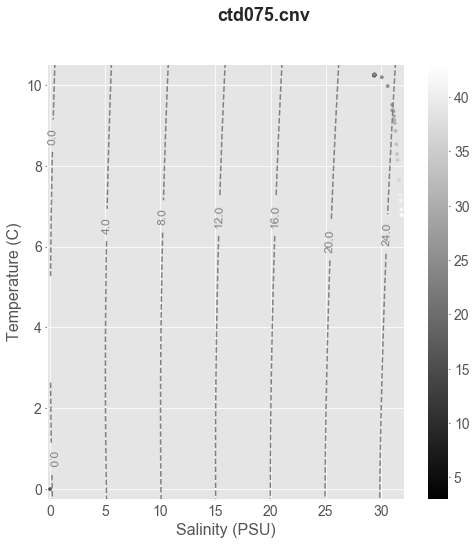

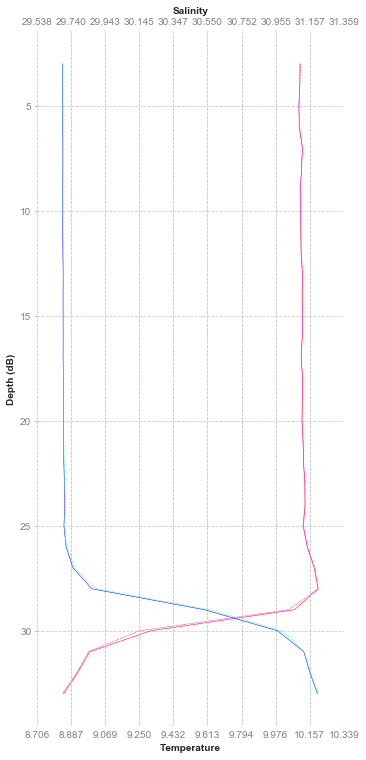

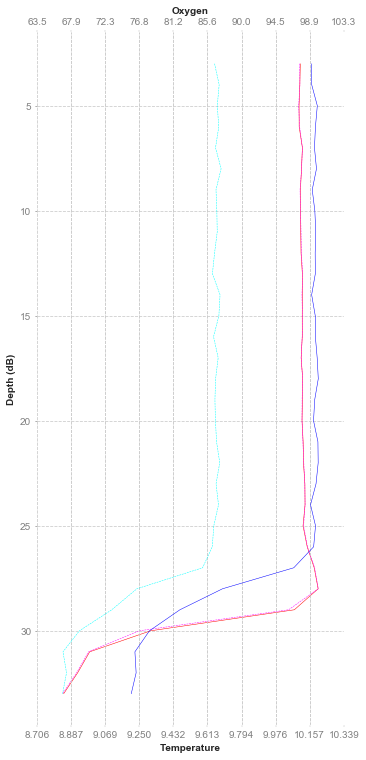

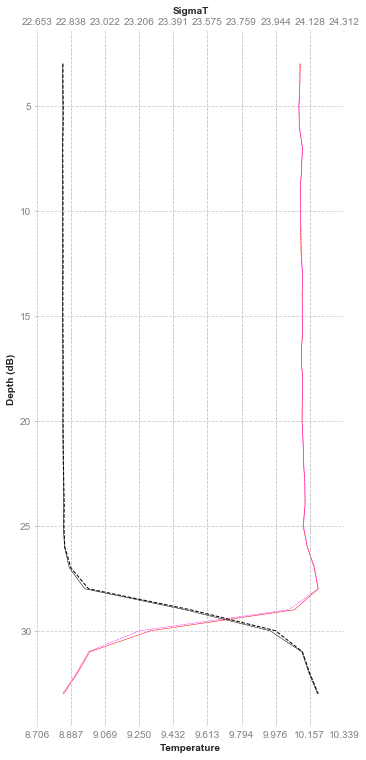

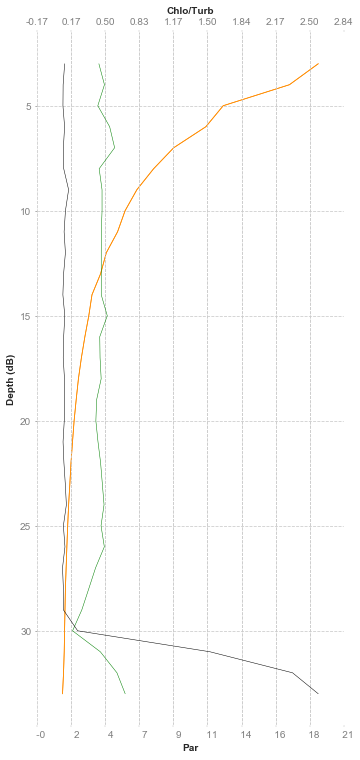

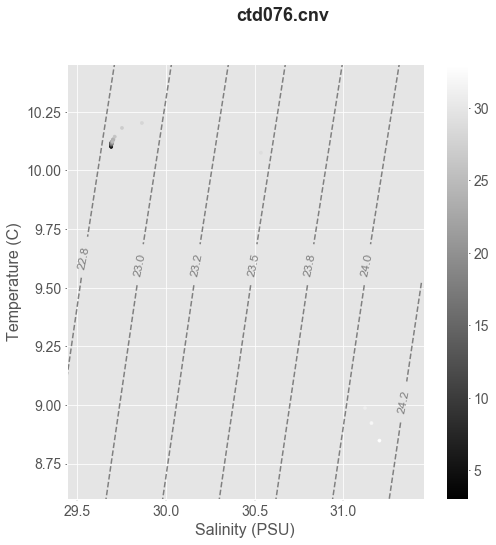

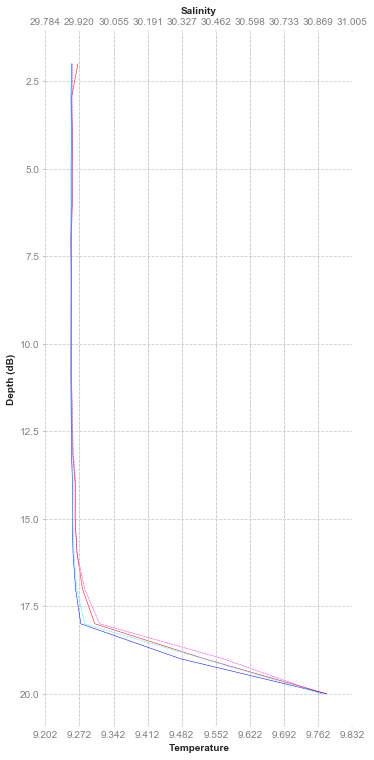

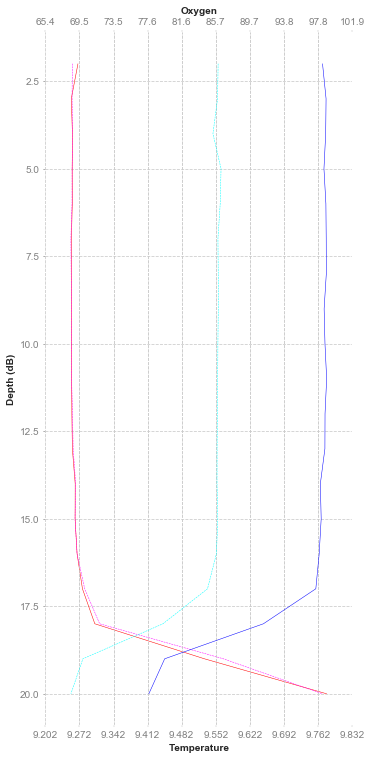

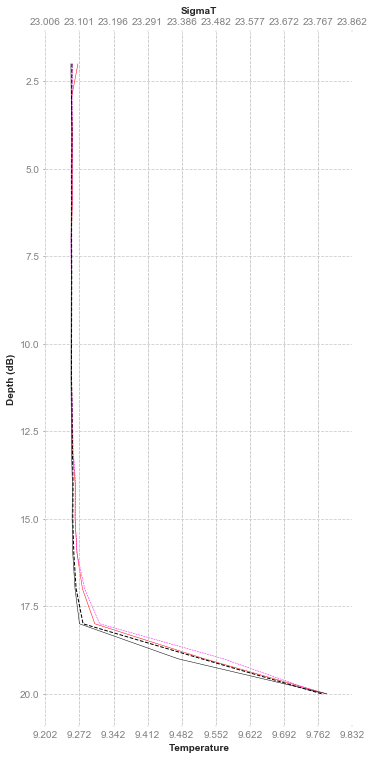

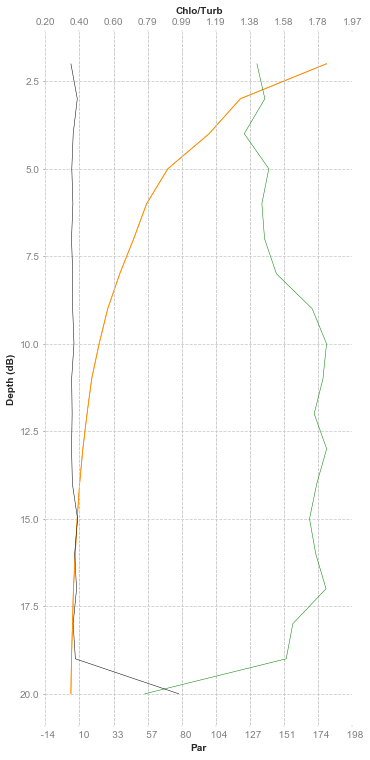

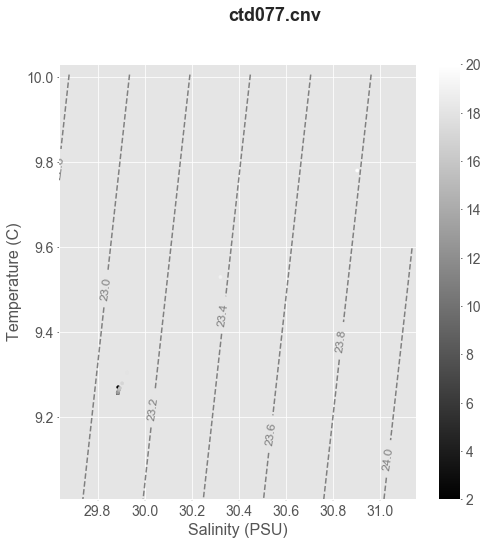

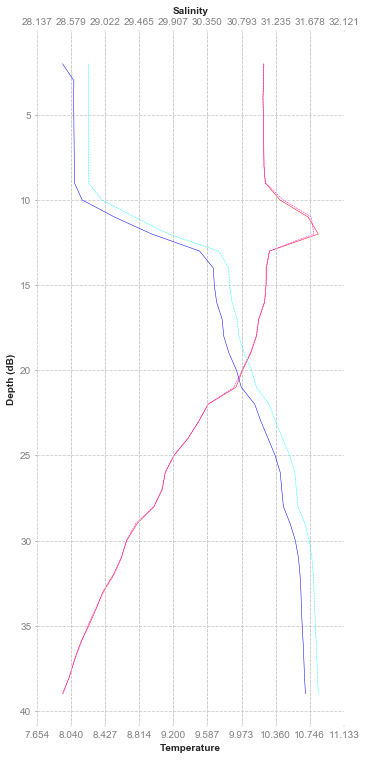

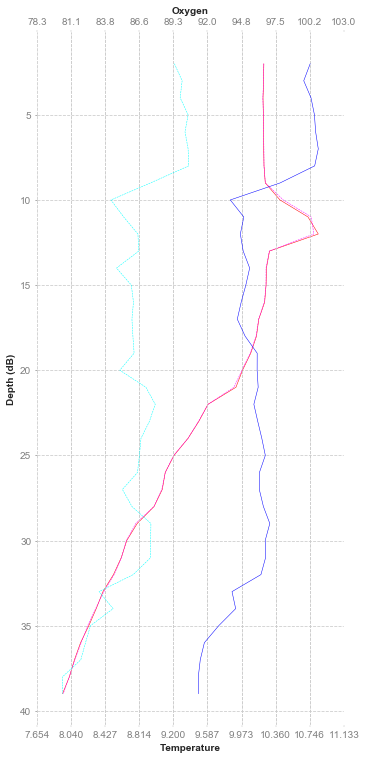

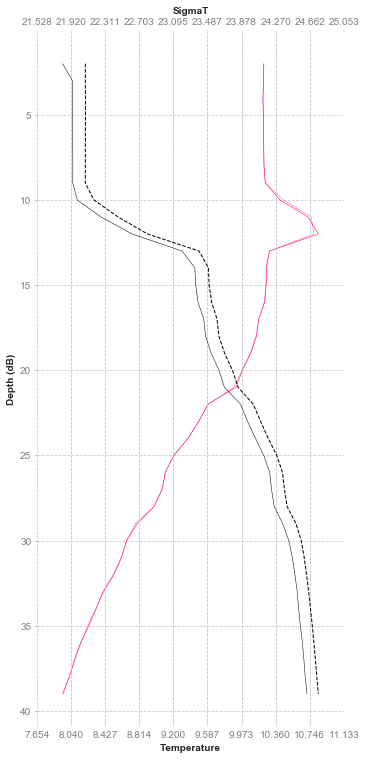

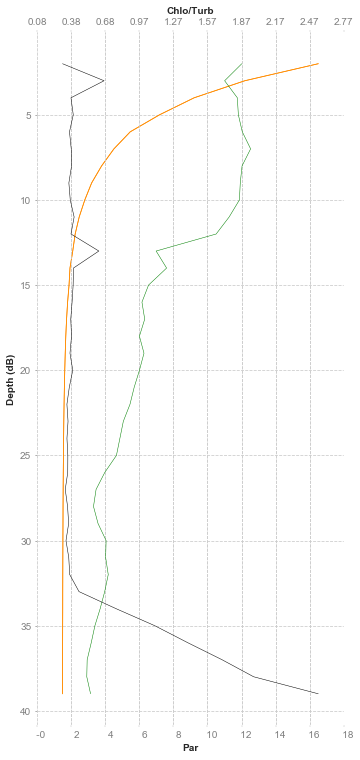

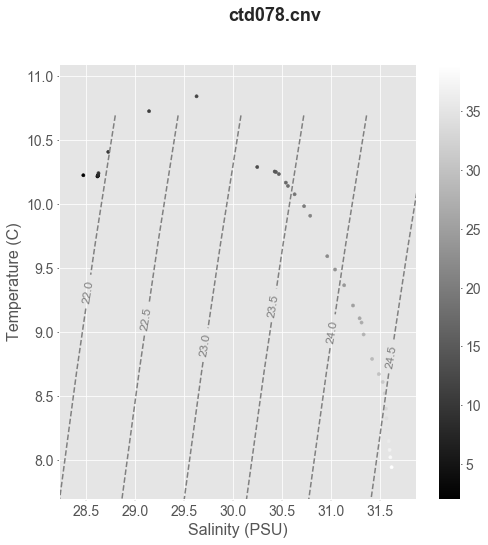

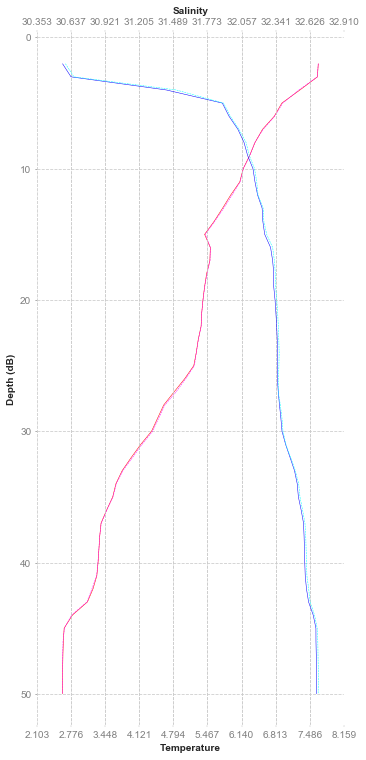

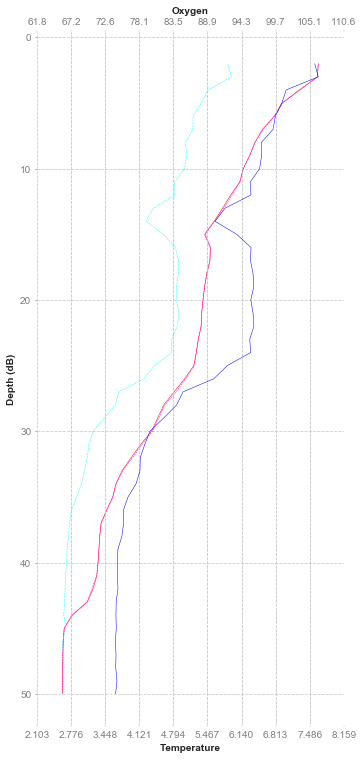

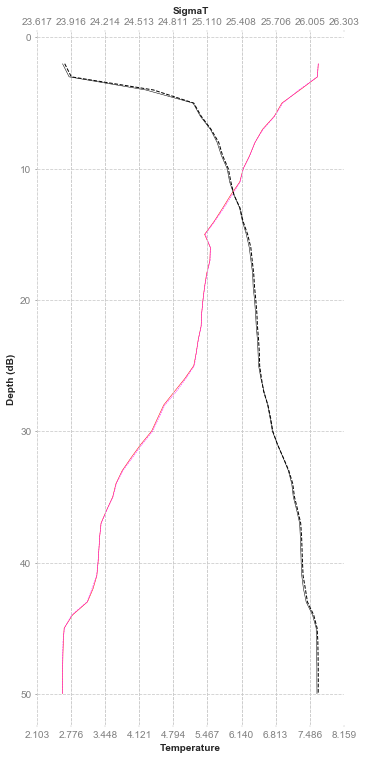

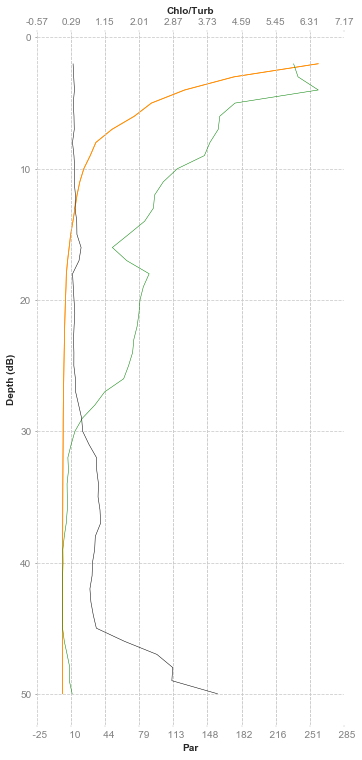

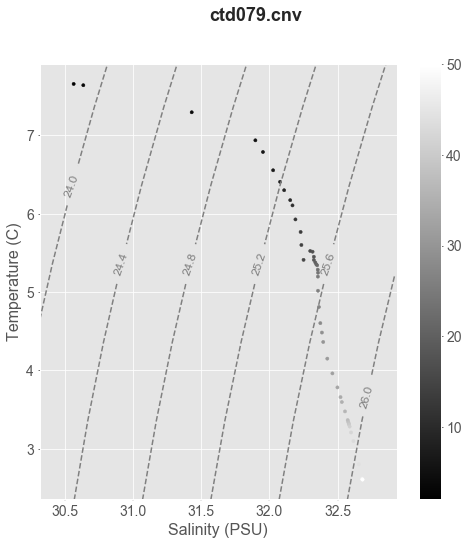

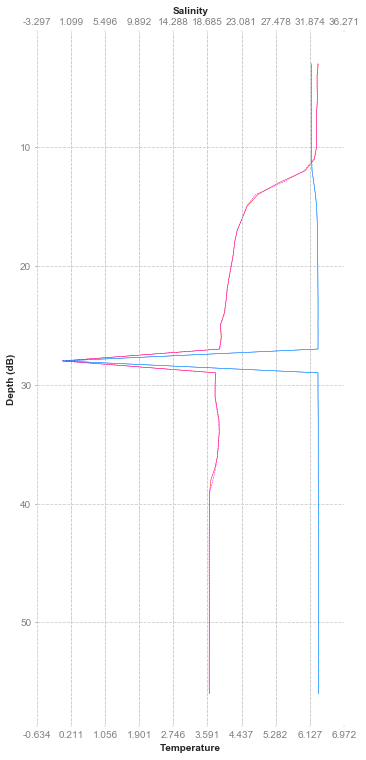

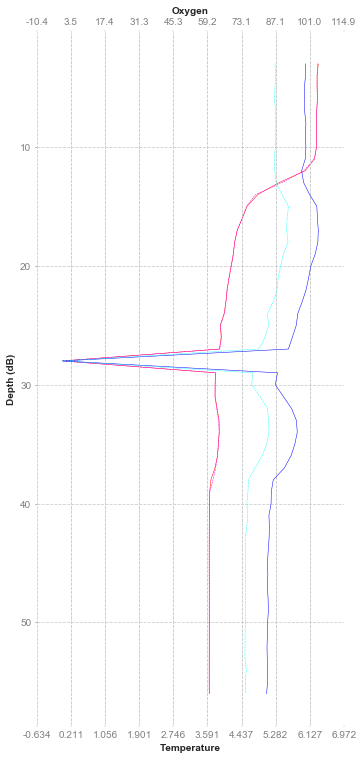

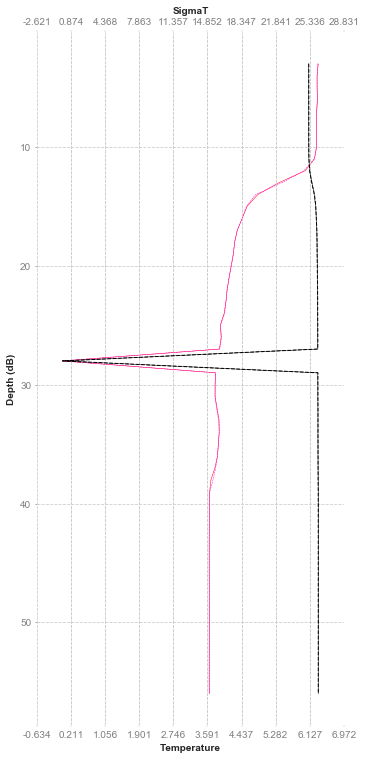

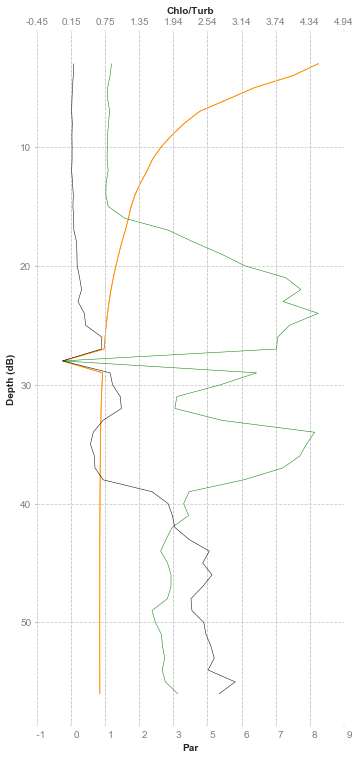

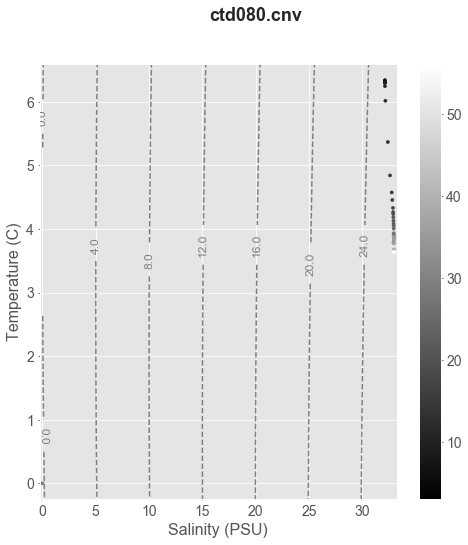

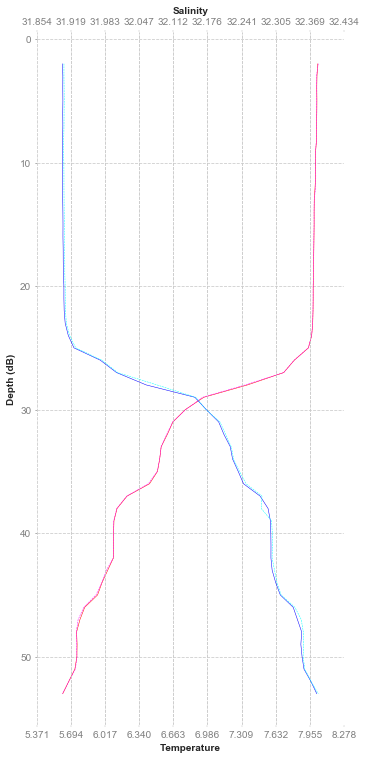

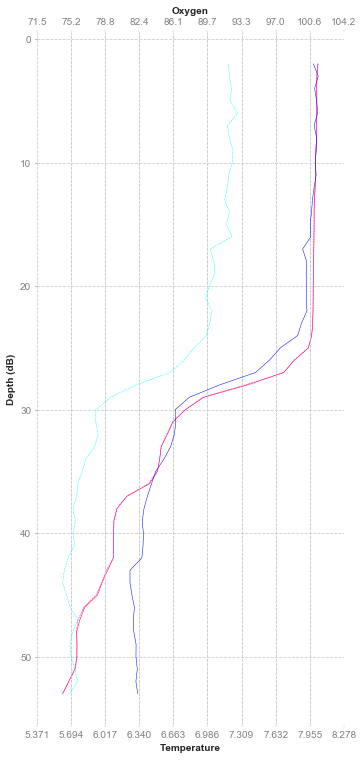

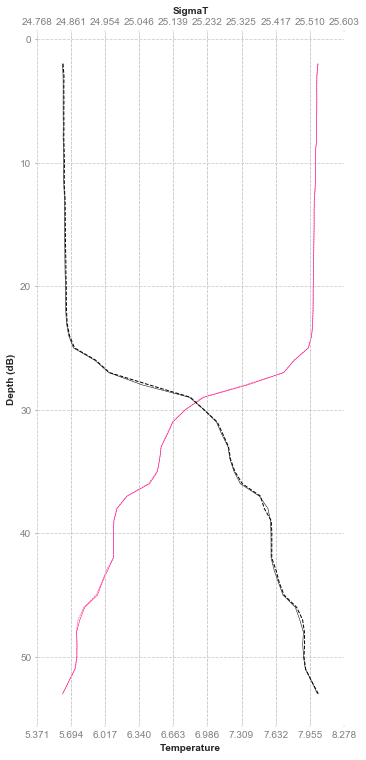

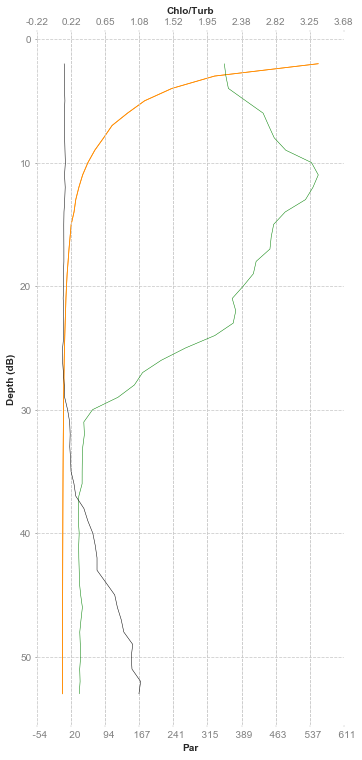

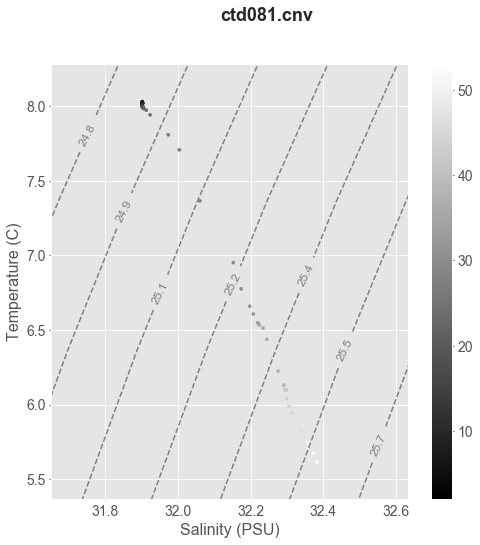

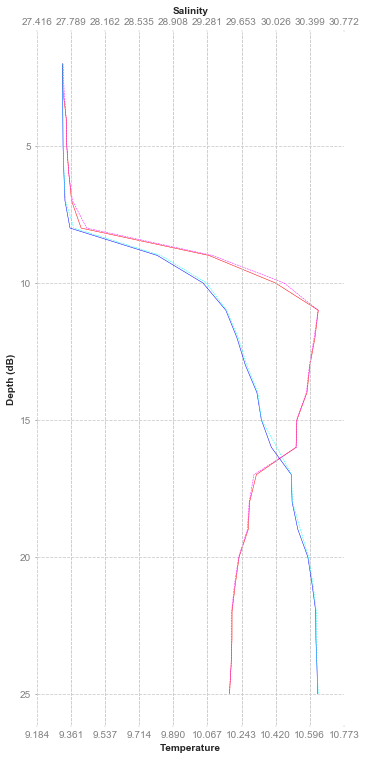

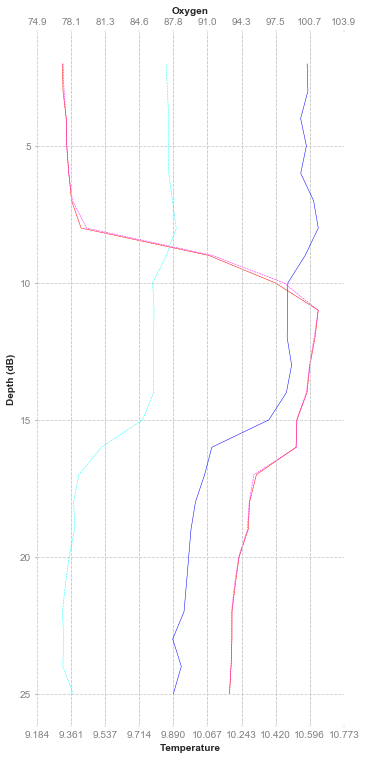

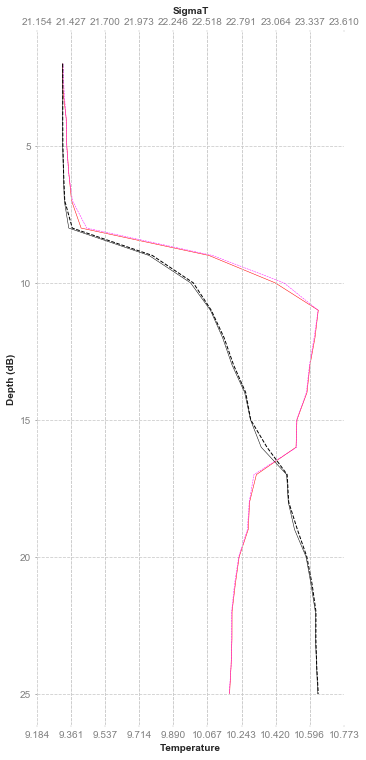

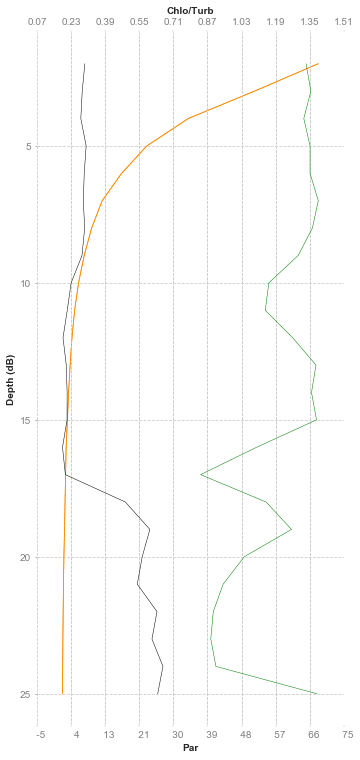

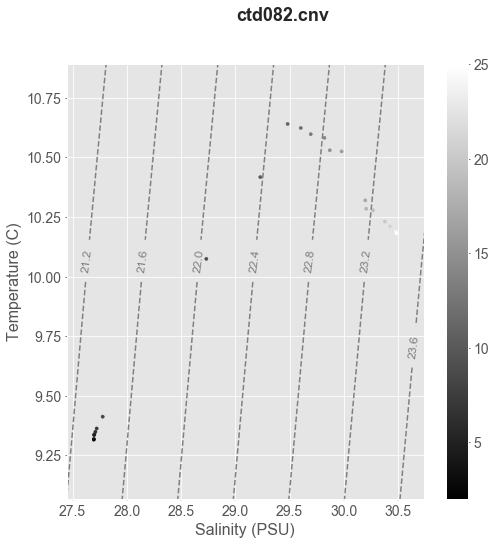

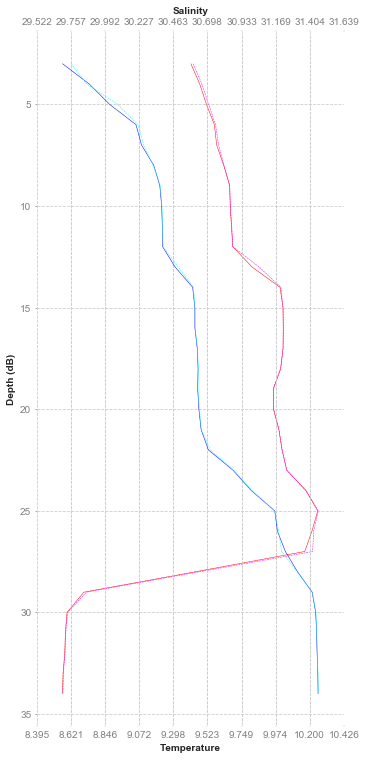

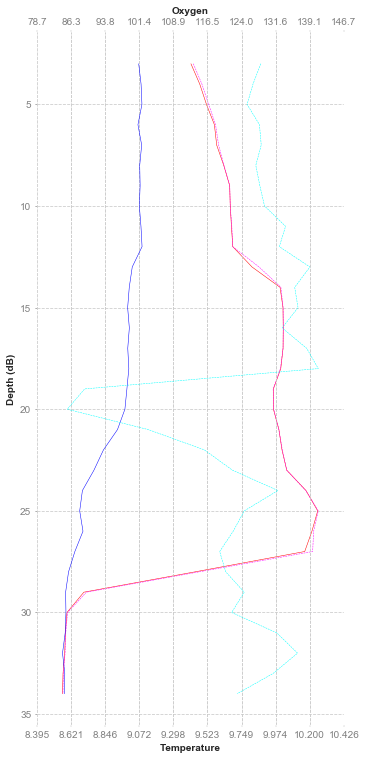

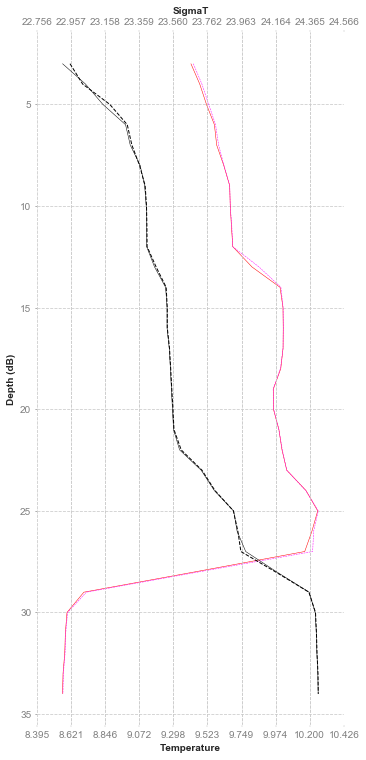

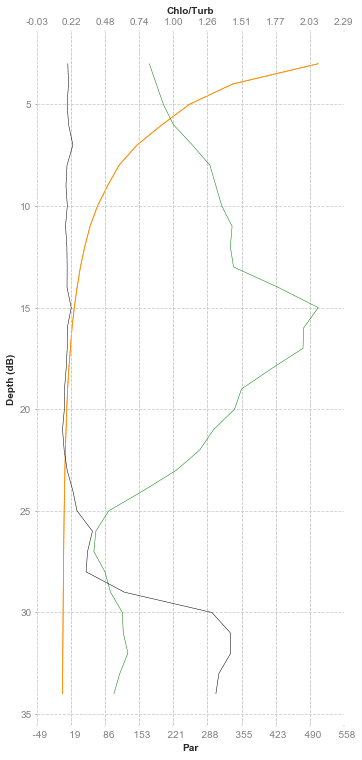

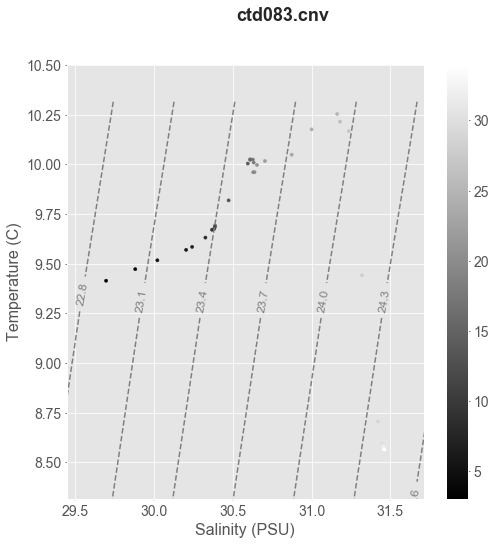

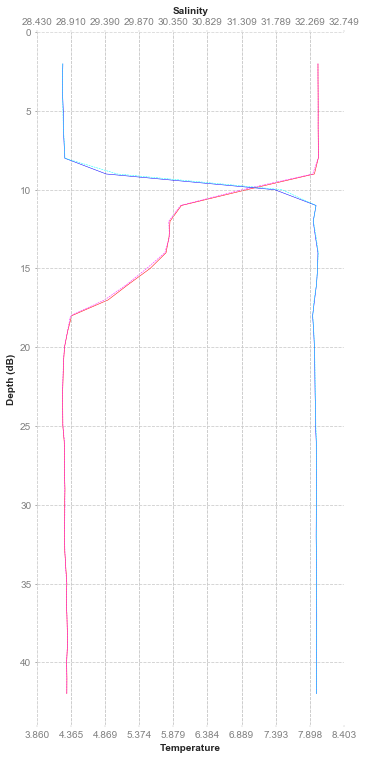

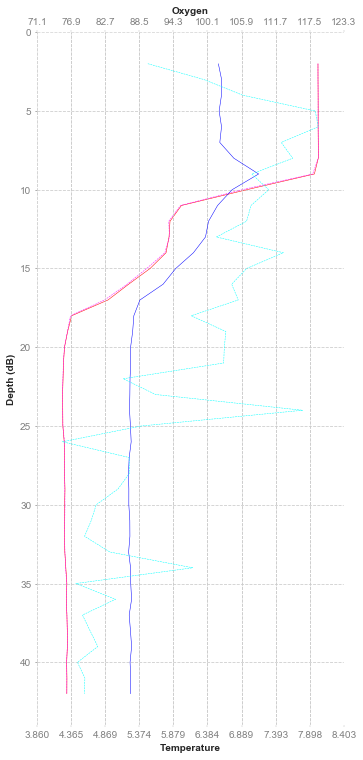

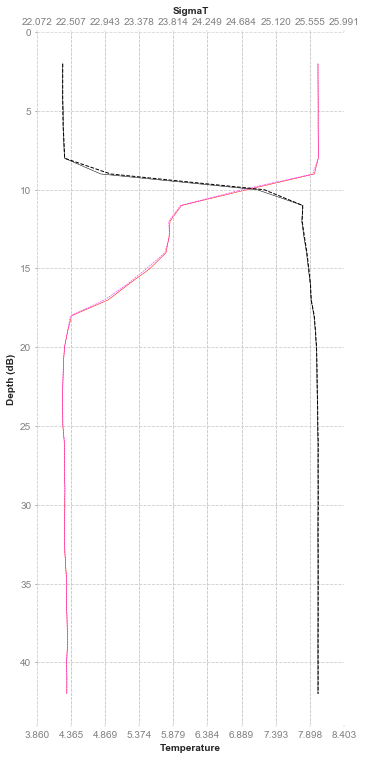

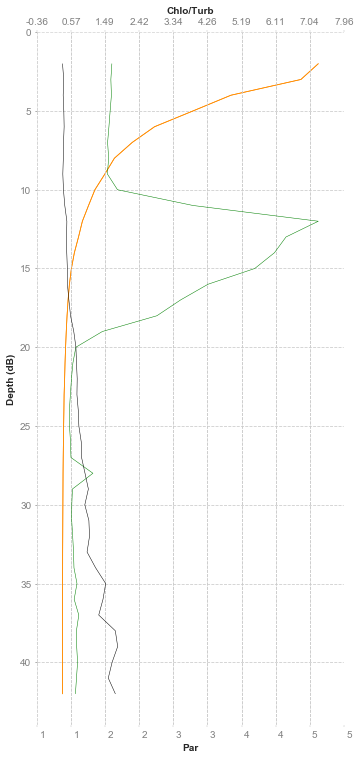

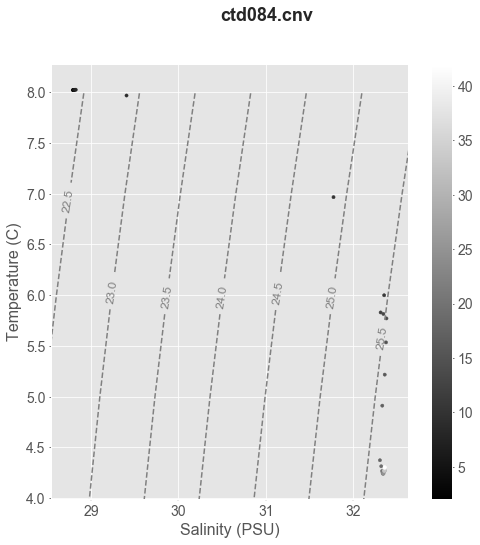

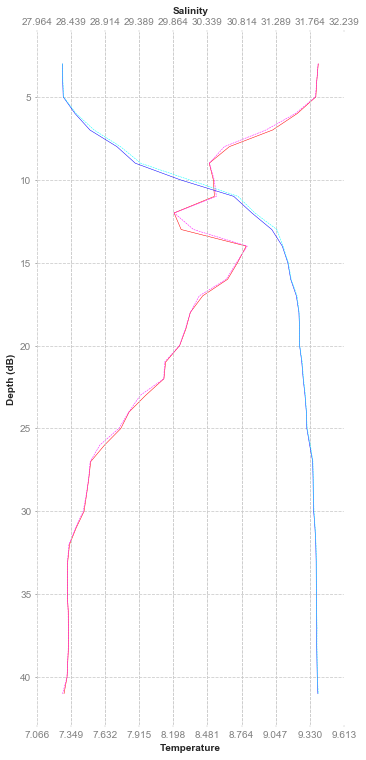

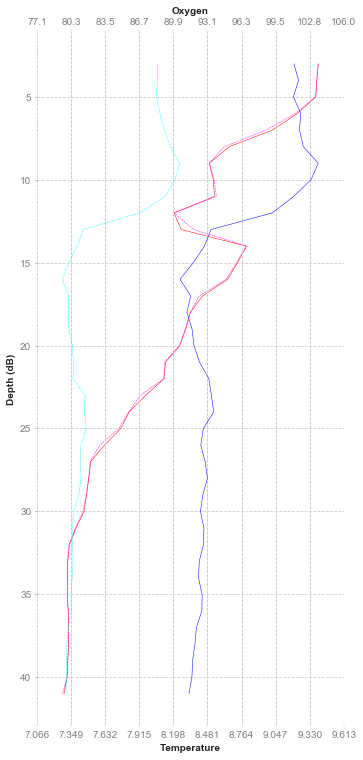

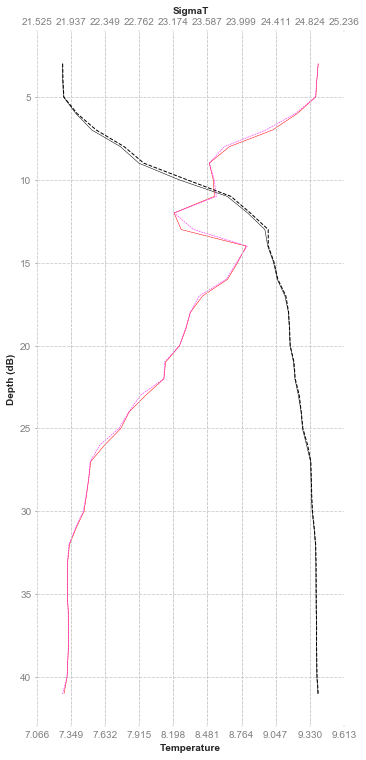

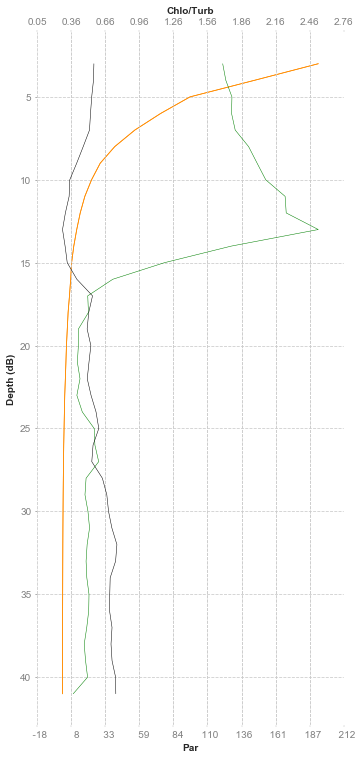

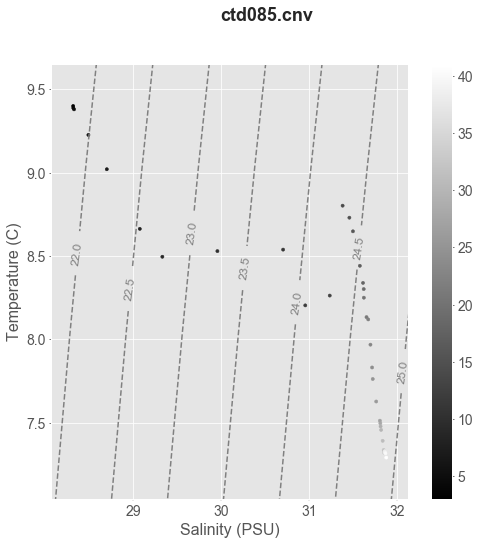

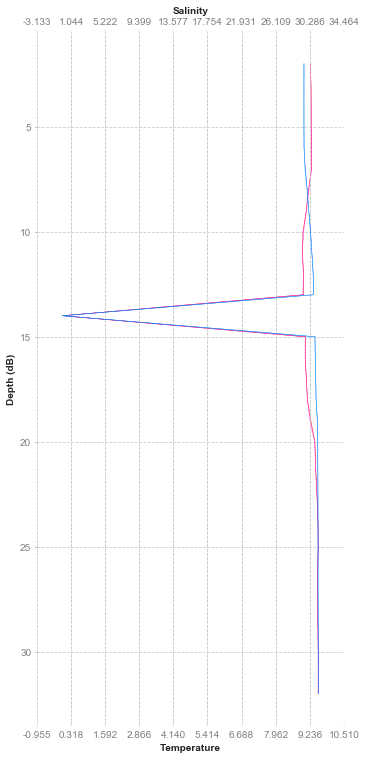

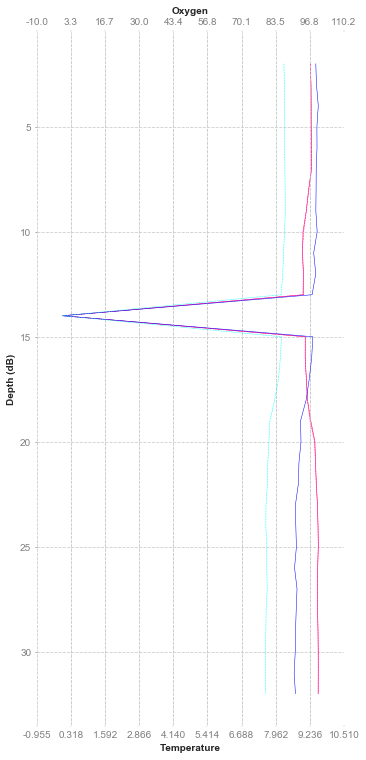

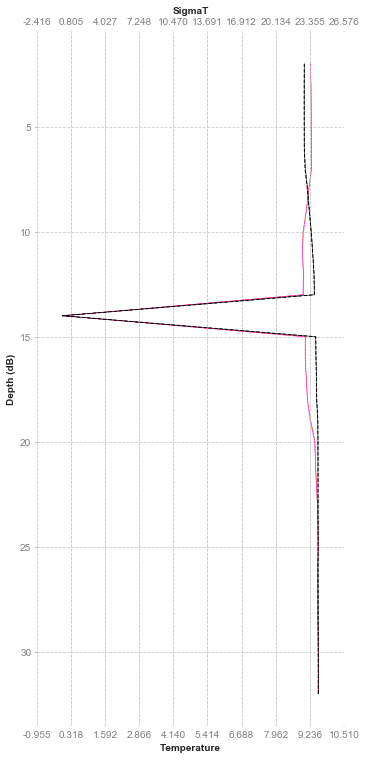

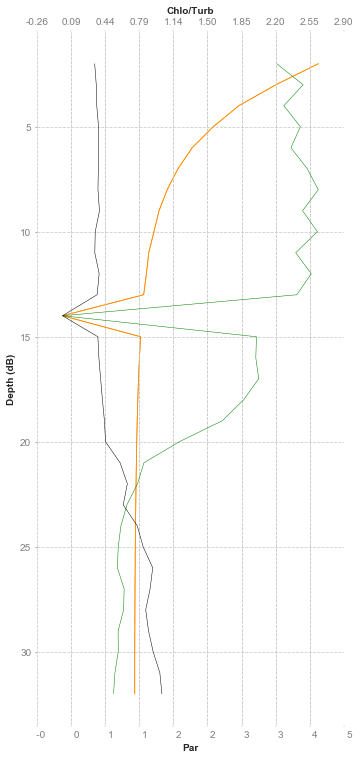

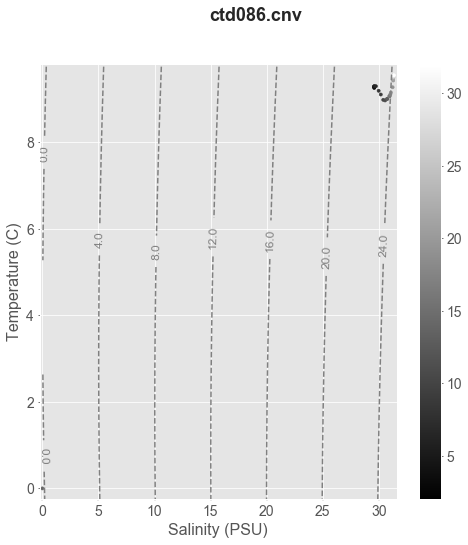

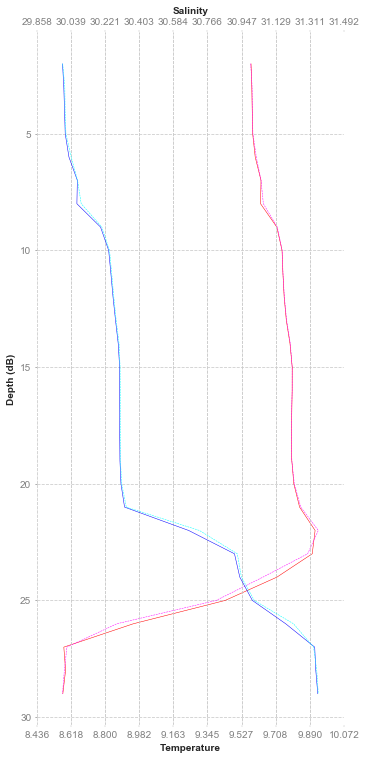

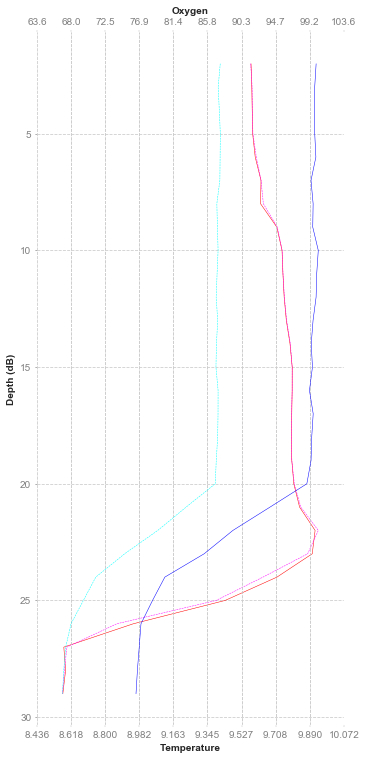

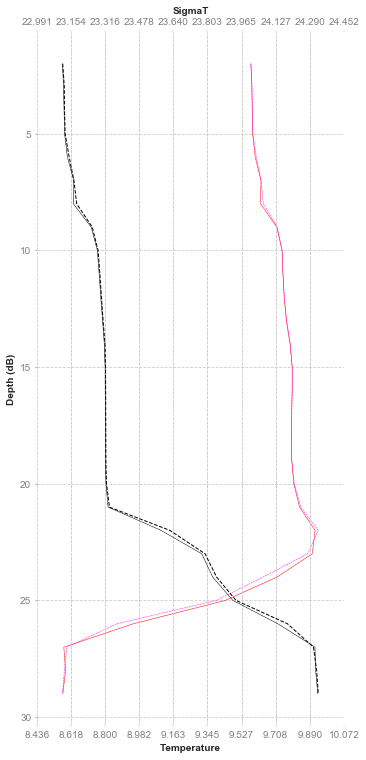

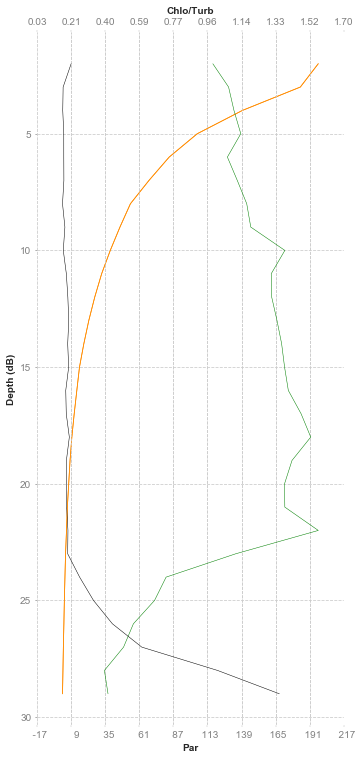

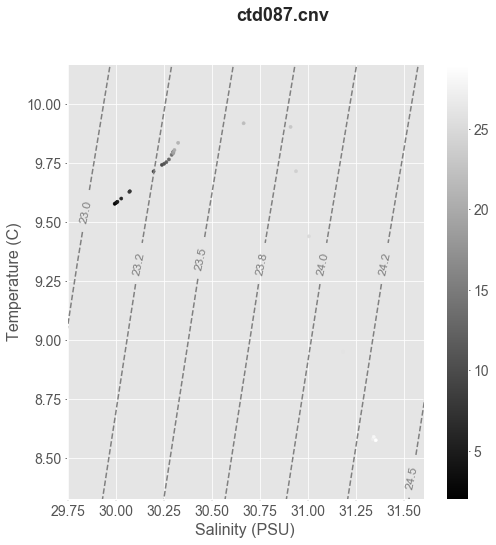

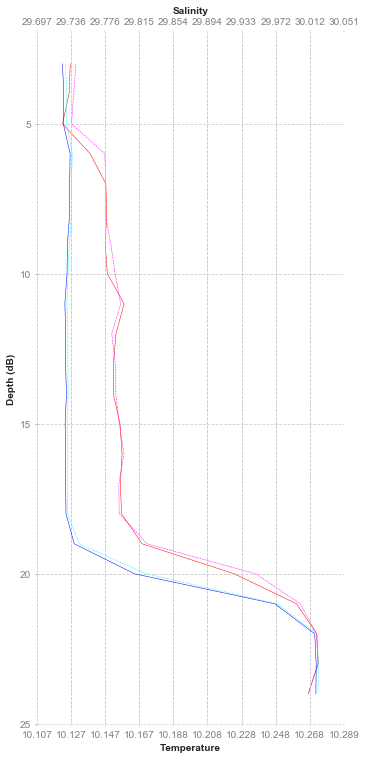

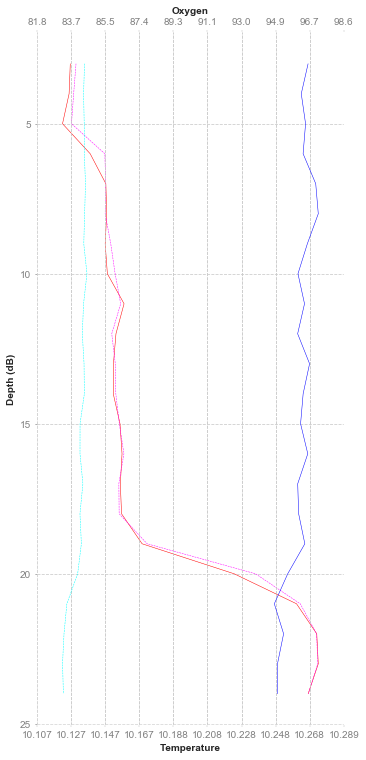

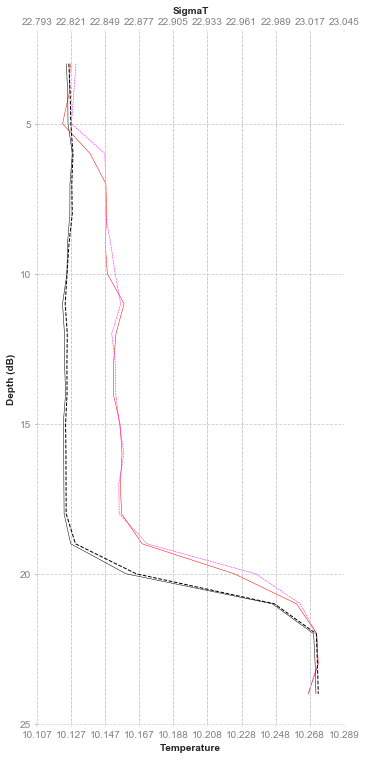

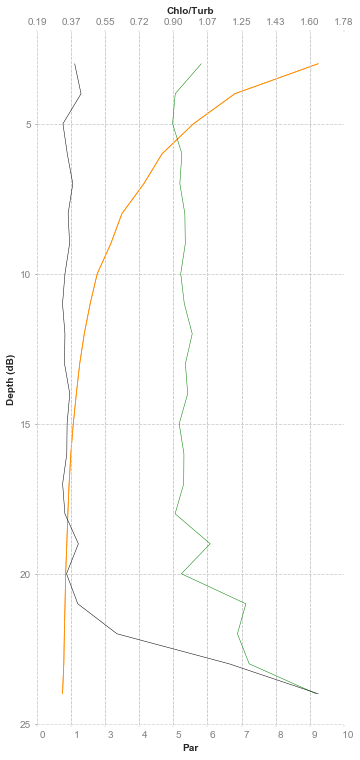

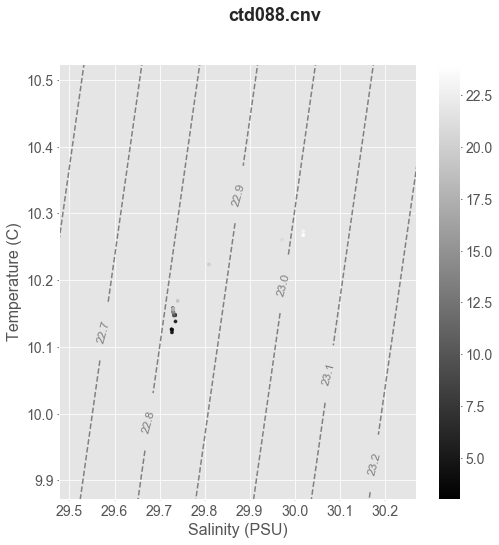

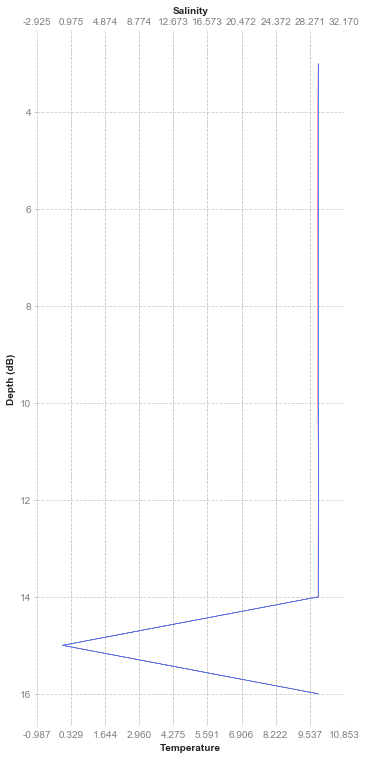

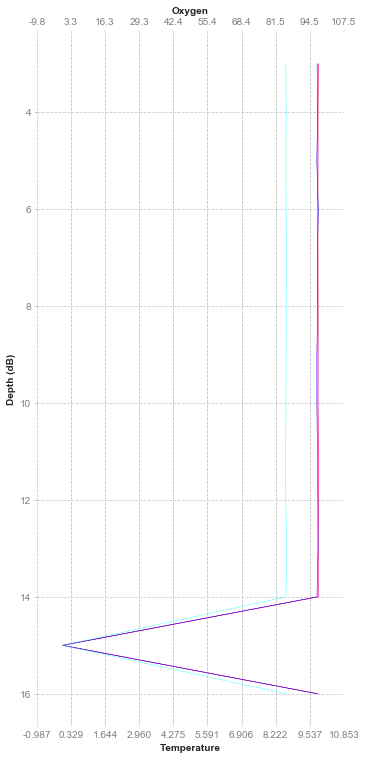

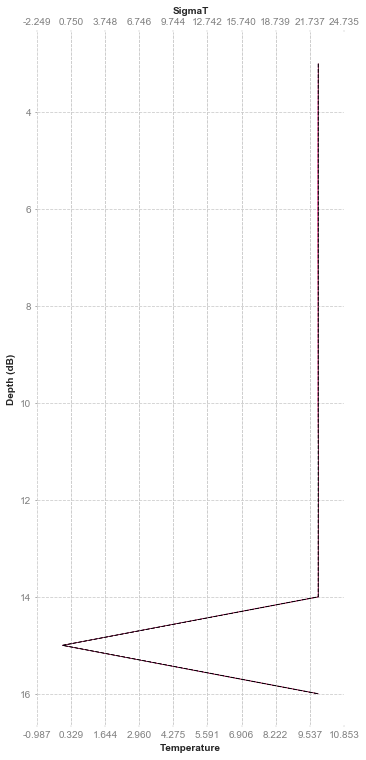

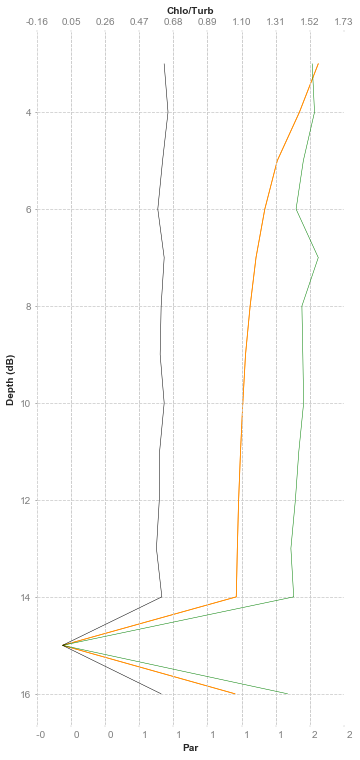

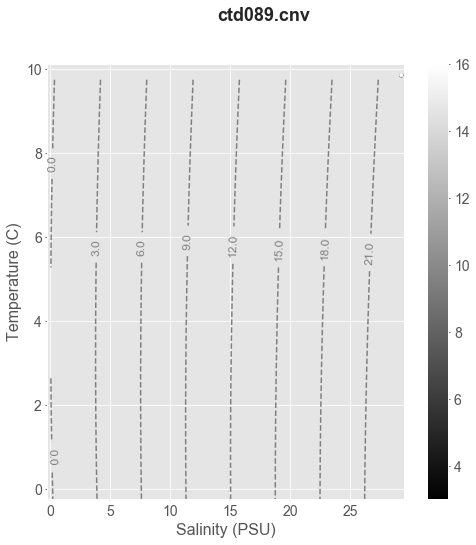

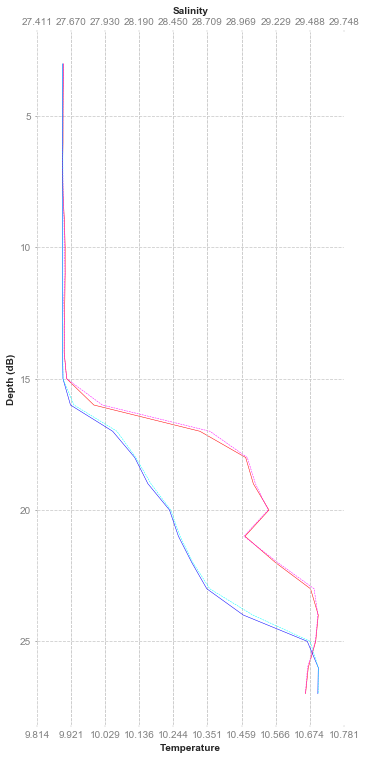

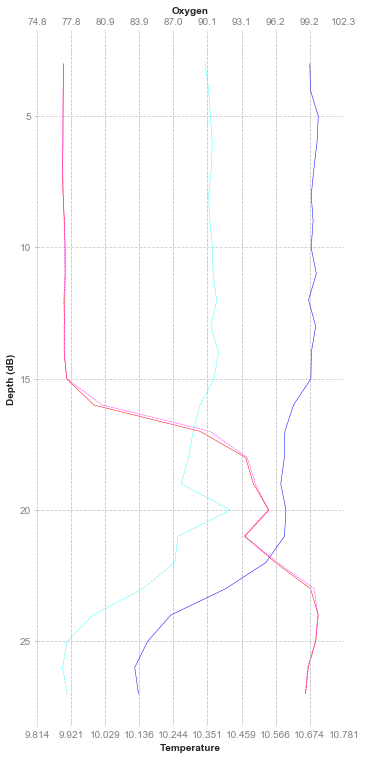

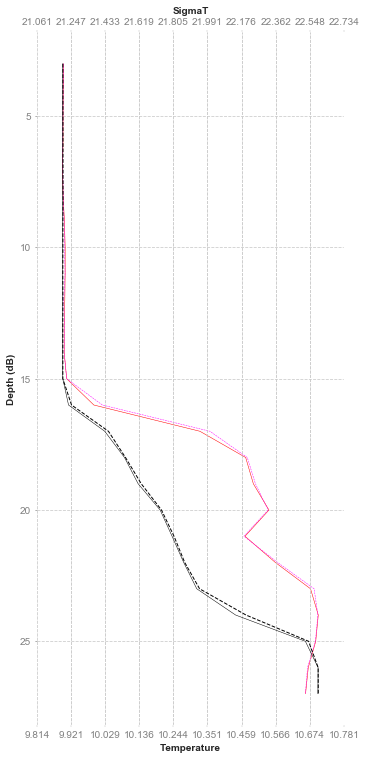

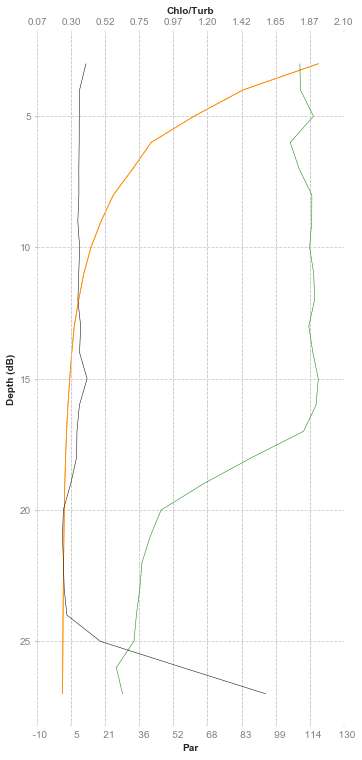

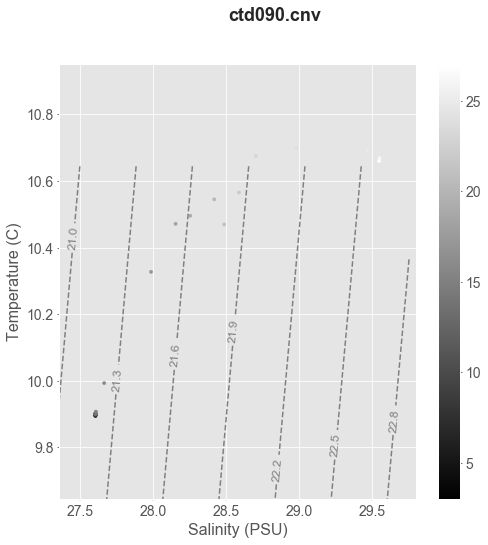

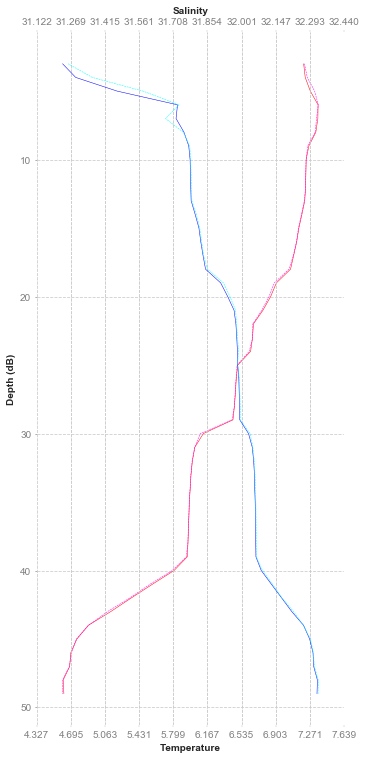

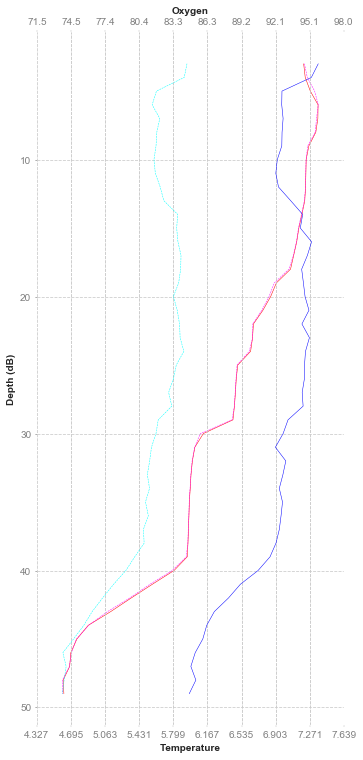

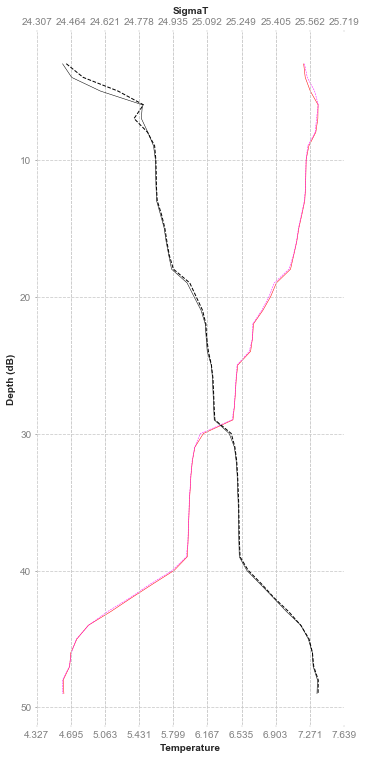

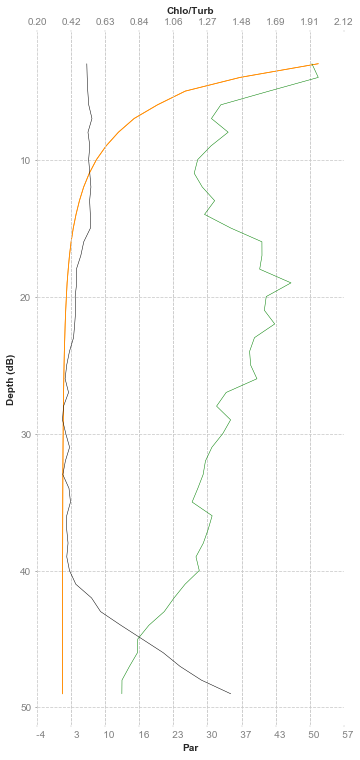

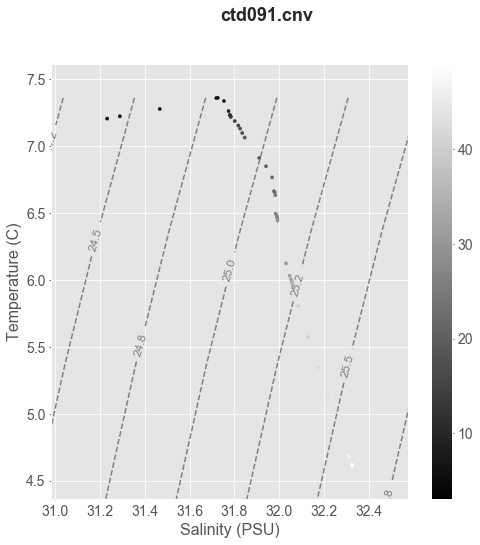

In [4]:
plots=True
for ctdfile in sorted(glob.glob(fpath + '*.cnv')):
    if not plots:
        break
    try:
        print(f"Working on {ctdfile}")
        ctd_df = ctd.from_cnv(ctdfile)
        ctd_data = EcoSeabird.CTDProfilePlot()
    except:
        continue
        
    #plots
    try:
        plt,fig =ctd_data.plot2var(epic_key=['T_28','T2_35','S_41','S_42'],
                          xdata=[ctd_df.t090C,ctd_df.t190C,ctd_df.sal00,ctd_df.sal11],
                          ydata=ctd_df.index.values,
                          secondary=True,
                          xlabel=['Temperature','Salinity'])

        DefaultSize = fig.get_size_inches()
        fig.set_size_inches( (DefaultSize[0], DefaultSize[1]*3) )
        plt.savefig(ctdfile.split('/')[-1].replace('.cnv','_TempSal.png'))

        plt,fig =ctd_data.plot2var(epic_key=['T_28','T2_35','OST_62','CTDOST_4220'],
                          xdata=[ctd_df.t090C,ctd_df.t190C,ctd_df.sbeox0PS,ctd_df.sbeox1PS],
                          ydata=ctd_df.index.values,
                          secondary=True,
                          xlabel=['Temperature','Oxygen'])

        DefaultSize = fig.get_size_inches()
        fig.set_size_inches( (DefaultSize[0], DefaultSize[1]*3) )
        plt.savefig(ctdfile.split('/')[-1].replace('.cnv','_TempOxy.png'))

        plt,fig =ctd_data.plot2var(epic_key=['T_28','T2_35','ST_70','ST_2070'],
                          xdata=[ctd_df.t090C,ctd_df.t190C,ctd_df['sigma-t00'],ctd_df['sigma-t11']],
                          ydata=ctd_df.index.values,
                          secondary=True,
                          xlabel=['Temperature','SigmaT'])

        DefaultSize = fig.get_size_inches()
        fig.set_size_inches( (DefaultSize[0], DefaultSize[1]*3) )
        plt.savefig(ctdfile.split('/')[-1].replace('.cnv','_TempSigmaT.png'))

        plt,fig =ctd_data.plot2var(epic_key=['PAR_905','PAR_905','Fch_906','Trb_980'],
                          xdata=[ctd_df.par,ctd_df.par,ctd_df['flECO-AFL'],ctd_df.turbWETntu0],
                          ydata=ctd_df.index.values,
                          secondary=True,
                          xlabel=['Par','Chlo/Turb'])

        DefaultSize = fig.get_size_inches()
        fig.set_size_inches( (DefaultSize[0], DefaultSize[1]*3) )
        plt.savefig(ctdfile.split('/')[-1].replace('.cnv','_ParChlorTurb.png'))

        fig = EcoSeabird.plot_salvtemp(ctd_df.sal00,ctd_df.t090C,ctd_df.index,
                            srange=[ctd_df.sal00.min()-0.25,ctd_df.sal00.max()+.25],
                            trange=[ctd_df.t090C.min()-0.25,ctd_df.t090C.max()+.25],
                            ptitle=ctdfile.split('/')[-1])
        fig.savefig(ctdfile.split('/')[-1].replace('.cnv','_TSSigma_depth.png'))
    except:
        continue